# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [61]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

- ### Binning real numbers

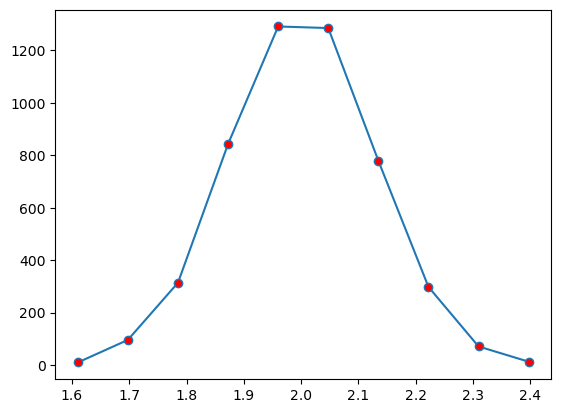

In [62]:
## Bining real numbers
# Use random library to generate 5000 data points from a Gaussian distribution with mu = 2 and sigma = 0.125
mu = 2
sigma = 0.125
data = np.random.normal(mu, sigma, 5000)

# Use numphy histogram to bin the data into 10 bins
hist, bin_edges = np.histogram(data, bins=10)

# Calculating midpoints of bins
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram using matplotlib.pyplot.plot
plt.figure()
plt.plot(bin_midpoints, hist,'-o', markerfacecolor='r', markersize=6)
plt.show()

- In this exercise, np.histogram returns an array of histogram values hist, and an array of bin edges bin_edges. bin_edges has one extra lenght compared to hist. This was dealed with by finding the midpoints of the bins.

- ### Binning integers

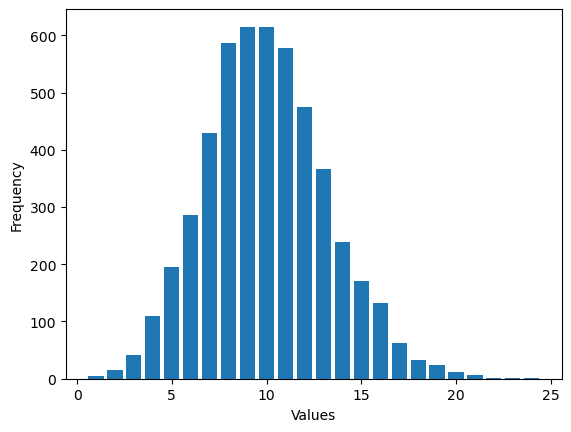

In [63]:
# Use nump.random.poisson to generate 5000 numbers with lambda = 10. 
data = np.random.poisson(10, 5000)

# Find the maximum and the minimum numbers in data
min_val = np.min(data)
max_val = np.max(data)

# Create a vector v that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number in the data and the last bin contains the maximum number in the data
# Use the vector by setting numpy.histogram's bin parameter to bin=v. 
v = np.arange(min_val - 0.5, max_val + 1.5, 1)
hist, bin_edges= np.histogram(data, bins=v)

total_data_points=np.sum(hist) #5000


# Compute midpoints of the bin edges
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure()
plt.bar(bin_centers, hist, width=0.8, align='center')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

- ## Binning and plotting degree distributions

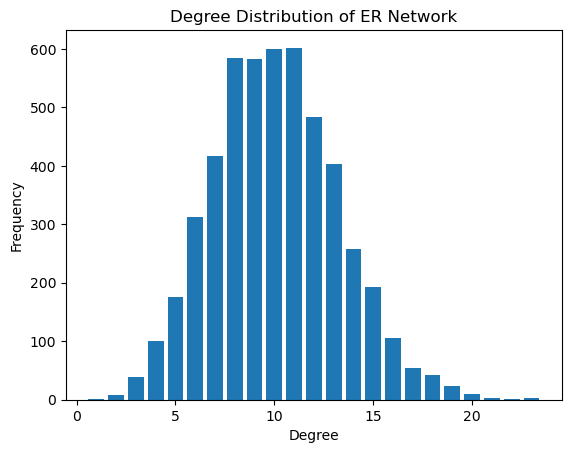

In [64]:
# Determine the parameters for the ER network
N = 5000
avg_degree = 10
p = avg_degree / (N - 1)

# Generate the ER network
G = nx.erdos_renyi_graph(N, p)

# Extract the degree distribution
degrees = [degree for node, degree in G.degree()]

# Create histogram of the degree distribution
hist, bin_edges = np.histogram(degrees, bins=np.arange(0.5, max(degrees)+1.5), density=False)

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram using a bar chart
plt.bar(bin_centers, hist, width=0.8, align='center')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of ER Network')
plt.show()

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.


The approximate number of nodes Ncr for the network to be connected is: 9119


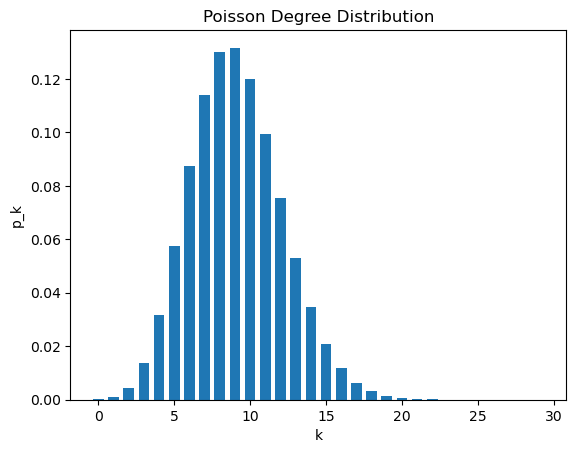

In [79]:
# An Erdos Renyi network with N = 5000 and p = 0.001
N = 5000
p = 0.001 # =10^-3

# Possible number of edges
pos_num_edges = N * (N - 1) / 2

# Expected number of links 
L = p * pos_num_edges #12497.5

# Average degree
k = p * (N-1) #4.999

# Find the value ln(5000)
ln_N = np.log(N) #8.517

# k value is greater than 1, but less than ln(5000). Therefore, the network is in the supercritical regime. 

# For the network to be in the critical regime, the <k> value must be equal to 1. 
p_c = 1/(N-1) # 1/4999 = 2.0004e-4

# For the network to be have only one component (connected), it should be in the connected regime. For this to happen, <k>
# must be greater than ln(5000).

# Solve for N_new: 0.001 * (N_new - 1) > ln(N_new)

from sympy import Symbol, solve
from scipy.optimize import fsolve
import math

p = 0.001

def equation(N):
    return p * (N - 1) - np.log(N)

# Initial guess
N_initial_guess = 5000

Ncr = fsolve(equation, N_initial_guess)[0]
print(f"The approximate number of nodes Ncr for the network to be connected is: {int(Ncr)}")

# The approximate number of nodes Ncr for the network to be connected is: 9119
N_new = 9119

# New average degree
k_new = p * (N_new - 1) # 9.118

# Average distance between two nodes for the new network
ln_k_new = np.log(k_new) # 2.209
d = ln_N / ln_k_new # 3.85

# The degree distribution p_k of the new network
def poisson_pk(k, k_avg):
    return (np.exp(-k_avg) * k_avg**k) / np.math.factorial(k)

# Calculate p_k for a range of k values
k_values = np.arange(0, 30)  # You can adjust the range as needed
pk_values = [poisson_pk(k, k_new) for k in k_values]

# Plotting
plt.bar(k_values, pk_values, width=0.7, align='center')
plt.xlabel('k')
plt.ylabel('p_k')
plt.title('Poisson Degree Distribution')
plt.show()

* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

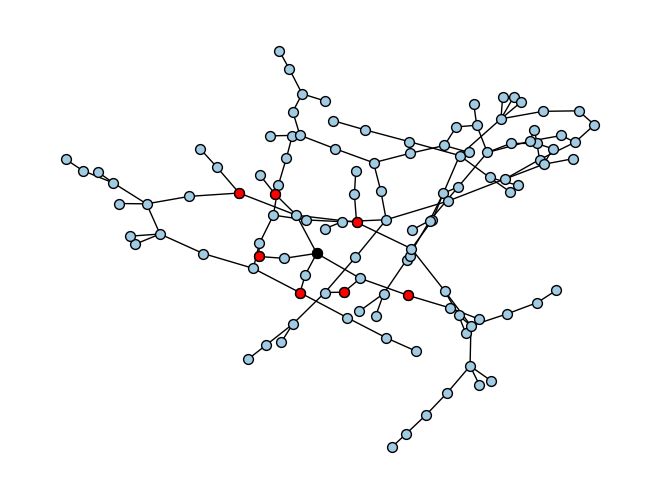

In [47]:
# An Erdos Renyi network with N = 200 and k = 1.5
N = 200
k = 1.5

#Calculate the probability of a node pair being connected
p = k / (N - 1)

#Generate the network
G = nx.erdos_renyi_graph(N, p)

#Use networkx.connected_components to find the largest connected component of the network (gcc)
gcc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(gcc)

#Choose a random node from the gcc
random_node = random.choice(list(gcc))

#Find all nodes that are up to 2 steps away from the random node
nodes_2_steps_away = nx.single_source_shortest_path_length(subgraph, random_node, cutoff=2)

#Separate the nodes into the two categories (apart from the random node)
two_step_nodes = []
other_nodes = []

for node, distance in nodes_2_steps_away.items():
    if distance == 2:
        two_step_nodes.append(node)

for node in subgraph.nodes():
    if node != random_node and node not in nodes_2_steps_away:
        other_nodes.append(node)

#Draw the network
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_size=50, node_color="#A0CBE2", edge_color="#000000", edgecolors="#000000")
nx.draw_networkx_nodes(subgraph, pos, nodelist=two_step_nodes, node_color="#ff0000", node_size=50, edgecolors="#000000")
nx.draw_networkx_nodes(subgraph, pos, nodelist=[random_node], node_color="#000000", node_size=50, edgecolors="#000000")
plt.show()

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

Average shortest path length for G1:  62.875751503006015
Average shortest path length for G2:  7.843478957915831
Average shortest path length for G3:  4.753442885771543
[62.87575150300602, 22.969516152304603, 13.465042244488977, 10.276859799599197, 7.722061723446894, 6.089763527054108]
[7.105427357601002e-15, 4.0197273397346995, 1.3179972248244438, 0.7913866512080094, 0.3227461923613605, 0.12563873909824846]


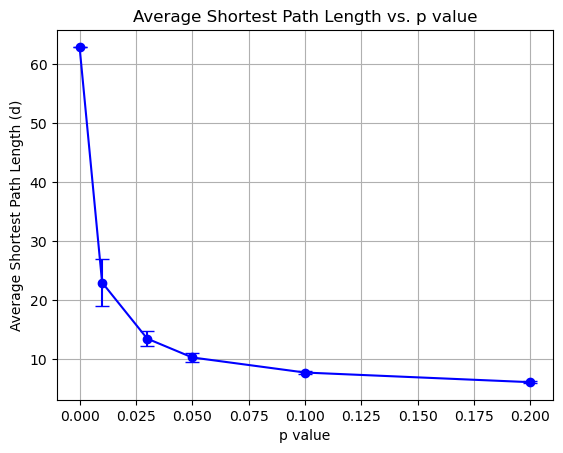

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# Watts-Strogatz Networks

# Define parameters
n = 500
k = 4
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

# Generate 3 Watts-Strogatz graphs with 500 nodes
# 1. A graph with k=4 and p=0
G1 = nx.watts_strogatz_graph(n, k, p_values[0])
# 2. A graph with k=4 and p=0
G2 = nx.watts_strogatz_graph(n, k, p_values[4])
# 3. A graph with k=4 and p=0
G3 = nx.watts_strogatz_graph(n, k, 1)

# Calculate the average shortest path length for each one
print("Average shortest path length for G1: ", nx.average_shortest_path_length(G1))
print("Average shortest path length for G2: ", nx.average_shortest_path_length(G2))
print("Average shortest path length for G3: ", nx.average_shortest_path_length(G3))

# Describe what happens to the network when p=1
# When p=1, the graph becomes a random graph, 
# and the average shortest path length is close to 1.

# Generate 50 WS networks with N=500, k=4 and for each of p=0, 0.01, 0.03, 0.05, 0.1 and 0.2
num_networks = 50

# Lists to store average shortest path lengths and their standard deviation
d_avg_values = []
d_std_values = []

# Generate networks
for p in p_values:
    d_values = []
    for _ in range(num_networks):
        G = nx.watts_strogatz_graph(n, k, p)
        d = nx.average_shortest_path_length(G)
        d_values.append(d)
    
    d_avg = np.mean(d_values)
    d_std = np.std(d_values)

    d_avg_values.append(d_avg)
    d_std_values.append(d_std)

print(d_avg_values)
print(d_std_values)


# Plot
plt.errorbar(p_values, d_avg_values, yerr=d_std_values, fmt='-o', capsize=5, color='blue')
plt.xlabel('p value')
plt.ylabel('Average Shortest Path Length (d)')
plt.title('Average Shortest Path Length vs. p value')
plt.grid(True)
plt.show()


# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

100


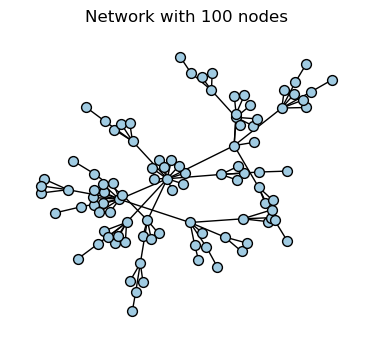

5000


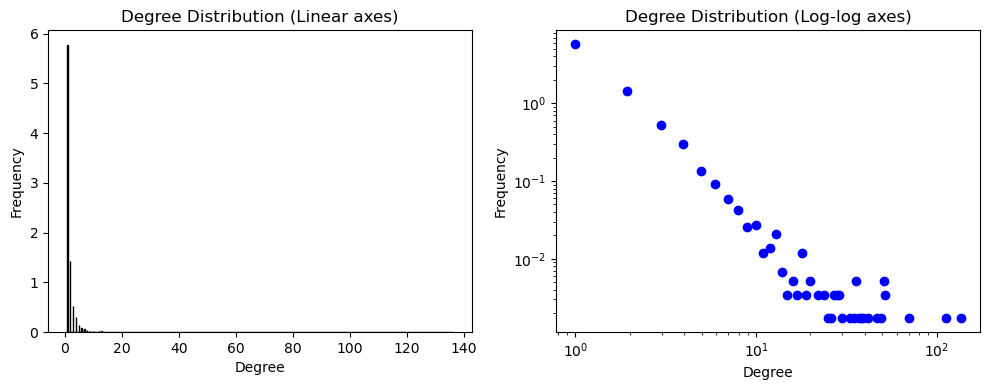

In [55]:
import random

# Create a graph consisting of a single link
G = nx.Graph()
G.add_edge(1, 2)

# Function to get a node with probability proportional to its degree
def get_node_proportional_to_degree(G):
    # Flatten the list of edges
    flattened_list = []
    for edge in G.edges():
        for node in edge:
            flattened_list.append(node)
    return random.choice(flattened_list)

for i in range(2, 101):
    G.add_node(i)
    target = get_node_proportional_to_degree(G)
    G.add_edge(i, target)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
nx.draw(G, node_size=50, node_color="#A0CBE2", edge_color="#000000", edgecolors="#000000")
plt.title("BA Network with 100 nodes")
plt.show()

# Add nodes until we have a 100 node network
for i in range(3, 5001):  # Starting from 3 because we already have nodes 1 and 2
    G.add_node(i)
    target = get_node_proportional_to_degree(G)
    G.add_edge(i, target)

# 1. Get the degrees of all nodes in the graph
degrees = [degree for node, degree in G.degree()]

# 2. Binning using numpy.histogram
bin_counts, bin_edges = np.histogram(degrees, bins='auto', density=True)

# 3. Plot the Distribution

# Linear plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], bin_counts, width=np.diff(bin_edges), edgecolor="k", align="edge")
plt.title("Degree Distribution (Linear axes)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Log-log plot
plt.subplot(1, 2, 2)
plt.loglog(bin_edges[:-1], bin_counts, 'bo')
plt.title("Degree Distribution (Log-log axes)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

In [76]:

count_paradox_true = 0

for _ in range(1000):
    # 1. Pick a Node and Find its Degree
    i = random.choice(list(G.nodes()))
    degree_i = G.degree(i)
    
    # 2. Find the Neighbors of the Node and Calculate Their Average Degree
    neighbors = list(G.neighbors(i))
    avg_degree_neighbors = sum(G.degree(neigh) for neigh in neighbors) / len(neighbors)
    
    # 3. Compare the Two Degrees
    if avg_degree_neighbors > degree_i:
        count_paradox_true += 1

print(f"Out of 1000 times, the friendship paradox is true {count_paradox_true} times.")

# Growth-only Network
G_no_pref = nx.Graph()
G_no_pref.add_edge(1, 2)

for i in range(3, 5001):
    G_no_pref.add_node(i)
    target = random.choice(list(G_no_pref.nodes()))
    G_no_pref.add_edge(i, target)

# 1. Determine p from the BA Network (G)
average_degree_G = sum(dict(G.degree()).values()) / len(G)
p = average_degree_G / (len(G) - 1)

# 2. Construct the Erdős–Rényi (ER) Network
G_er = nx.erdos_renyi_graph(5000, p)    

num_components_ba = nx.number_connected_components(G)
num_components_no_pref = nx.number_connected_components(G_no_pref)
num_components_er = nx.number_connected_components(G_er)

print(f"Number of connected components in BA network: {num_components_ba}")
print(f"Number of connected components in growth-only network: {num_components_no_pref}")
print(f"Number of connected components in ER network: {num_components_er}")

Out of 1000 times, the friendship paradox is true 635 times.
Number of connected components in BA network: 2
Number of connected components in growth-only network: 13
Number of connected components in ER network: 1


# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.